Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "upgrade"



In [4]:
import streamlit as st
import pandas as pd 
import matplotlib as plt
import seaborn as sns

from sklearn.datasets import load_iris


In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df=pd.DataFrame(X,columns=iris['feature_names'])

In [6]:
df['Type']=y

In [16]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
df_especies=df['Type'].replace([0, 1, 2], ['setosa', 'versicolor','virginica'])
df['Especies']=df_especies
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type,Especies
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [22]:
trace1 = go.Histogram(x=df[df['Type']==0]['sepal length (cm)'], name="setosa")
trace2 = go.Histogram(x=df[df['Type']==1]['sepal length (cm)'], name="versicolor", xaxis="x2")
trace3 = go.Histogram(x=df[df['Type']==2]['sepal length (cm)'], name="virginica", xaxis="x3")
data = [trace1, trace2, trace3]



<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

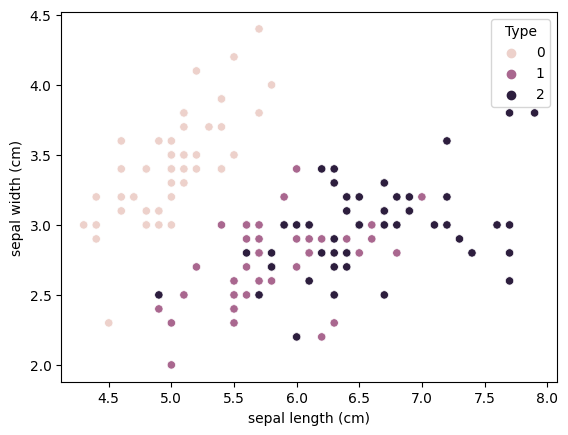

In [23]:
sns.scatterplot(data=df, x="sepal length (cm)", y="sepal width (cm)", hue="Type")


<AxesSubplot:>

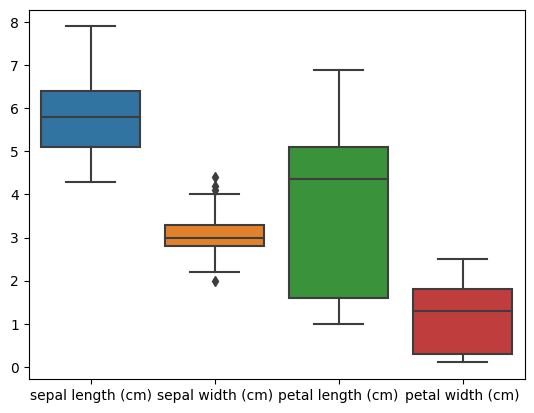

In [24]:
sns.boxplot(data=df[['sepal length (cm)','sepal width (cm)',"petal length (cm)",'petal width (cm)']])

## Como `CONECTARSE` a postgresql en streamlit

Archivo .toml

Conexion con DDBB

In [1]:
import psycopg2
import streamlit as st
# @st.experimental_singleton
def init_connection():
    return psycopg2.connect(**st.secrets['postgres'])

conn=init_connection()

# @st.experimental_memo(ttl=600)
def run_query(query):
    with conn.cursor() as cur:
        cur.execute(query)
        return cur.fetchall()
    
users=run_query('SELECT * FROM users')
courses=run_query('SELECT * FROM courses')
consimption=run_query('SELECT * FROM consumption')
labels=run_query('SELECT * FROM labels')
favorites=run_query('SELECT * FROM favorites')

conn.close()

In [9]:
df_users=pd.DataFrame(users,columns=['user_id','user_name','email','HiV_relation','age','identity','creartion_date','password','role','log_in_bool','update_date'])
df_courses=pd.DataFrame(courses,columns=[''])
df_consumption=pd.DataFrame(consimption)
df_labels=pd.DataFrame(labels)
df_favorites=pd.DataFrame(favorites)


In [6]:
df_courses

,0,1,2,3,4,5,6,7,8
0,1,El VIH y la importancia de la prevención media...,Vídeo divulgativo elaborado por Seisida que cu...,http://gtt-vih.org/videos/VIH_importancia_vacu...,Vídeo,63,SEISIDA,1970-05-02,None
1,2,Campaña SABES con Javier Cámara #LoPositivoEsS...,Campaña SABES con Javier Cámara porque #LoPosi...,http://gtt-vih.org/videos/sabes_Javier_Camara,Vídeo,71,Cesida,1970-05-22,None
2,3,Cambia la historia (vídeo completo),La Federación Nacional de Enfermos y Trasplant...,http://gtt-vih.org/videos/cambia_historia,Documento,42,FNETH,1970-09-28,None
3,4,InfoVIHtal VIH: Mitos y realidades,Existen muchas ideas equivocadas en torno al V...,http://gtt-vih.org/videos/mitos_realidades_sp,Vídeo,58,Grupo de Trabajo sobre Tratamientos del VIH,1970-01-05,1970-07-22
4,5,"Presentación de InfoVIHTal, información sobre ...","Las personas migrantes, por una serie de facto...",http://gtt-vih.org/videos/InfoVIHtal2014,Documento,67,Grupo de Trabajo sobre Tratamientos del VIH,1970-02-05,None
5,6,Día Mundial de la Vacuna contra el Sida,Declaración de IAVI con motivo del Día Mundial...,http://gtt-vih.org/videos/WAVD2014,Documento,61,Grupo de Trabajo sobre Tratamientos del VIH,1970-11-15,None
6,7,Cómo se hace un ensayo clínico - Proyecto ECRAN,Pequeño vídeo didáctico sobre cómo se desarrol...,http://gtt-vih.org/videos/como_se_hace_ensayo_...,Vídeo,77,Grupo de Trabajo sobre Tratamientos del VIH,1970-11-10,None
7,8,Un vuelo de placer - POR DETRÁS O POR DELANTE:...,Los/las compañeros/as de la asociación Algarab...,http://gtt-vih.org/videos/vuelo_de_placer,Vídeo,30,Algarabía Asociación LGBTI de Canarias,1970-05-27,None
8,9,Con V de VIH,"Campaña de visibilidad, solidaridad y prevenci...",http://gtt-vih.org/videos/con_V_de_vih,Vídeo,56,FELGTB,1970-02-07,None
9,10,Campaña de prevención de VIH en jóvenes Soy un...,Por una educación sexual veraz y de calidad.,http://gtt-vih.org/videos/soy_un_apoyo_positivo,Vídeo,71,Canal Apoyo Positivo,1970-02-22,1970-03-20


In [11]:
df_favorites

,0,1,2
0,9,Con V de VIH,248
1,7,Cómo se hace un ensayo clínico - Proyecto ECRAN,433
2,33,"Una historia, cuatro finales",484
3,35,Campaña prevención MTV México,420
4,36,Diálogos de sida,71
...,...,...,...
195,25,No dejes que el VIH se fije en ti,83
196,36,Diálogos de sida,349
197,2,Campaña SABES con Javier Cámara #LoPositivoEsS...,247
198,32,Diálogos de Sida: La prueba,387


In [8]:
df_consumption

,0,1,2
0,0,23,2023-03-16 15:44:02.347446
1,0,31,2023-03-16 15:44:02.347446
2,0,37,2023-03-16 15:44:02.347446
3,0,44,2023-03-16 15:44:02.347446
4,0,46,2023-03-16 15:44:02.347446
...,...,...,...
245,11,187,2023-03-16 15:44:02.347446
246,11,192,2023-03-16 15:44:02.347446
247,11,194,2023-03-16 15:44:02.347446
248,11,197,2023-03-16 15:44:02.347446


In [7]:
df_labels

,0,1
0,1,Charla
1,2,Campaña
2,3,Entrevista
3,4,Campaña
4,5,Campaña
5,6,Campaña
6,7,Campaña
7,8,Campaña
8,9,Campaña
9,10,Campaña


Union de dataframes

In [ ]:
df_for_class_ = pd.merge(df_data_2022,df_incl_2022 , on='id', how='left')